# Titanic - Machine Learning from Disaster

## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.25,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.28,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.92,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,26.55,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.05,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.00,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.00,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,675,11.72,NaN,2,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.00,C148,0,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 7), (223,))

## Modeling

In [8]:
from common import functions as func

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# space = dict()
# space['criterion'] = ["gini", "entropy"]
# space['splitter'] = ["best", "random"]
# space['max_depth'] = [n for n in range(20)]
# space['min_samples_split'] = [n for n in range(20)]
# space['min_samples_leaf'] = [n for n in range(20)]

# func.show_best_hyperparameter_optimization(
#     DecisionTreeClassifier(), 
#     space, 
#     X_train, 
#     y_train
# )

**Building, train and predict model**

In [10]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6, 
    min_samples_leaf=3,
    splitter="random")

pipeline = make_pipeline(
    StandardScaler(),
    decision_tree_classifier
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [11]:
featimps = decision_tree_classifier.feature_importances_
pctimps = list(map(lambda fi: round(fi * 100), featimps))

pd.DataFrame({
    "Features": X_train.columns, 
    "Relevance (%)": pctimps
})

,Features,Relevance (%)
0,Pclass,23
1,Sex,47
2,SibSp,8
3,Parch,3
4,Ticket,6
5,Embarked,5
6,AgeGroup,8


__Predict and show model result__

In [12]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.79329609 0.76966292 0.83707865 0.80337079 0.84831461]
Mean = 0.81 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[120  14]
 [ 33  56]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       134
           1       0.80      0.63      0.70        89

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223

----------------------------------------------------------------------
Accuracy: 0.79
Precicion: 0.80
Sensitivity aka Recall: 0.63
F1-Score: 0.70


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.76
----------------------------------------------------------------------


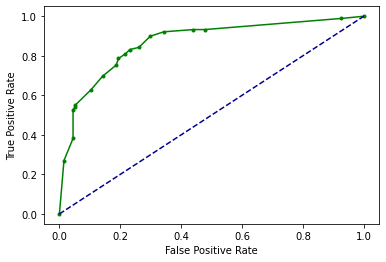

In [13]:
label = "Decision Tree Classifier"
func.show_curve_roc(pipeline, X_test, y_test, y_predict, label=label)

__Compare Ground Truth vs Prediction Model__

In [14]:
X_test_result = X_test.copy()
X_test_result["Ground Truth"] = y_test
X_test_result["Prediction"] = y_predict

In [15]:
X_test_result[
    (X_test_result["Ground Truth"] != X_test_result["Prediction"]) 
    # &
    # (X_test_result["Sex"] == 0) 
]

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,AgeGroup,Ground Truth,Prediction
709,3,1,1,1,189,0,0,1,0
39,3,0,1,0,186,0,3,1,0
136,1,0,0,2,55,2,0,1,0
621,1,1,1,0,56,2,0,1,0
447,1,1,0,0,45,2,0,1,0
192,3,0,1,0,406,2,0,1,0
673,2,1,0,0,145,2,0,1,0
141,3,0,0,0,332,2,0,1,0
204,3,1,0,0,530,2,0,1,0
23,1,1,0,0,42,2,0,1,0


In [16]:
train_df[train_df["Ticket"] == 203]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",0,29.0,0,2,203,7.62,NaN,0,0
852,853,0,3,"Boulos, Miss. Nourelain",0,9.0,1,1,203,7.62,NaN,0,1


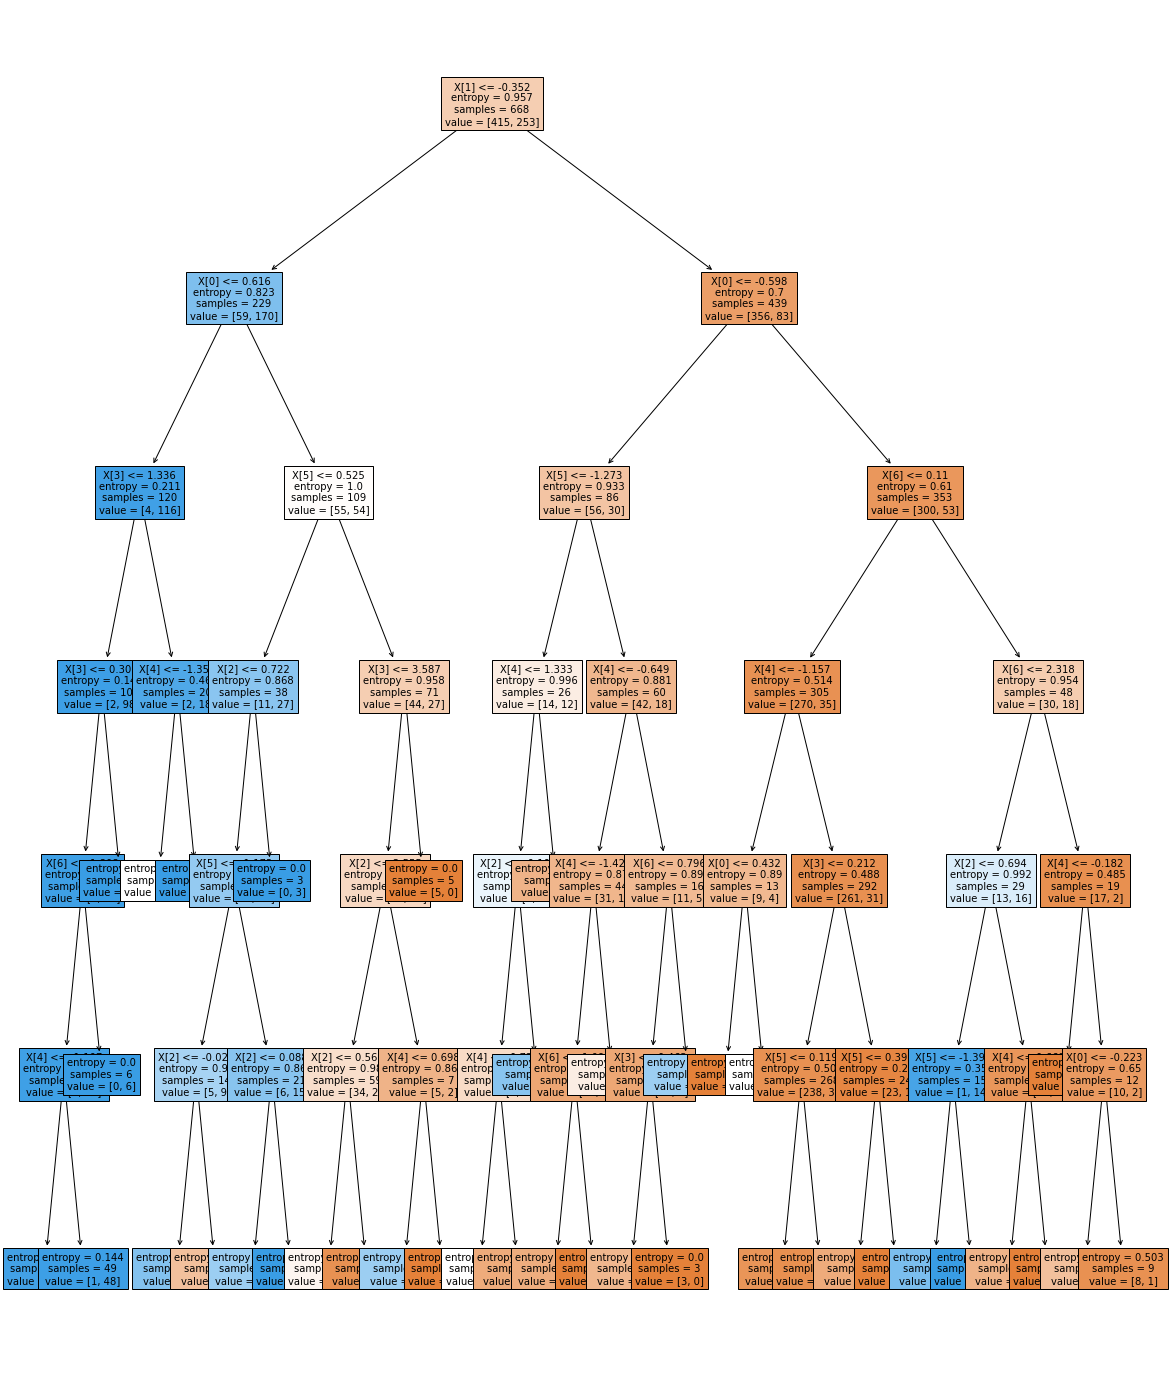

In [17]:
plt.figure(figsize=(20, 25))
tree.plot_tree(decision_tree_classifier, filled=True, fontsize=10)
plt.show()